In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from torch.utils.data import (
    Dataset,
    DataLoader,
)  

In [14]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time  # Import the time module

# Load data from CSV file
csv_file = r"C:\Users\uig38452\Master Thesis\Deep Learning\class_labels_all.csv"
root_dir = r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Lastt\numpy_samples_all_data_test"

annotations = pd.read_csv(csv_file)

X = []
y = []

for index, row in annotations.iterrows():
    file_name = row[0]
    file_path = os.path.join(root_dir, file_name)
    try:
        data = np.load(file_path)
        X.append(data)
        y.append(int(row[1]))
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

# Flatten each sample in X
X = [data.flatten() for data in X]
# Convert X to a NumPy array
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Start timer for training
start_train_time = time.time()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# End timer for training
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Start timer for prediction
start_pred_time = time.time()

# Predict labels for both training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# End timer for prediction
end_pred_time = time.time()
pred_time = end_pred_time - start_pred_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Training Time: {train_time} seconds")
print(f"Prediction Time: {pred_time} seconds")



Training Accuracy: 1.0
Testing Accuracy: 0.9753694581280788
Training Time: 14.834295272827148 seconds
Prediction Time: 0.31803274154663086 seconds


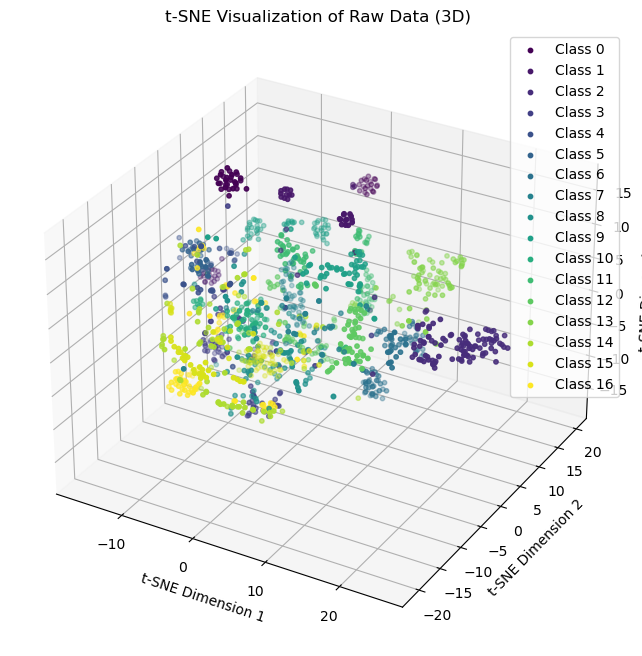

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Initialize t-SNE object
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform data to 3D
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define class names and colors
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 
               'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9',
               'Class 10', 'Class 11', 'Class 12', 'Class 13', 'Class 14',
               'Class 15', 'Class 16']  # Update with your class names

colors = plt.cm.viridis(np.linspace(0, 1, len(class_names)))

for i, color in zip(range(len(class_names)), colors):
    idx = y == i
    ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1], X_tsne[idx, 2], label=class_names[i], color=color, s=10)

ax.set_title('t-SNE Visualization of Raw Data (3D)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.legend()
plt.show()
